In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

import scipy.stats as stat
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.stats import linregress

import itertools

import helperfile as hf


# Way Better but values are A = 2 not 2.5 

In [2]:
# Block of Code to show FIT Image

# bins, intensities  = hf.CreateData('180NoBRun1.txt')
# bins, intensities =  np.array(bins), np.array(intensities)
# hf.Plots(bins, intensities, "B=0.384 kG, Polarize = 180 deg, Intensity Plot - Full set", 'Bins', 'Intensity [ADU] ', figsize0= 15, figsize1=4)

In [3]:
# STEP 1: Load Data 
xy = np.loadtxt('XYR3_180_Dic.txt', dtype=int, delimiter=',')
print(type(xy))
print(f"Number of trials to examine = {len(xy)/2}\nTotal Number of arrays = {len(xy)}")

<class 'numpy.ndarray'>
Number of trials to examine = 10.0
Total Number of arrays = 20


In [4]:
# # STEP 2: Check all graphs  

# hf.MakeManyPlots(xy)

Data ratio set


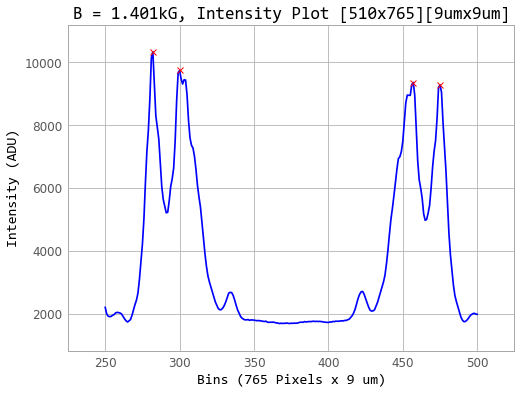

In [5]:
# STEP 5: TRUNCATE TO THE FIRST ORDER
peaks1, x_1, y_1 = hf.LabelPeaks_ShrinkData(xy[0],xy[1],250,500,6000)
peaks2, x_2, y_2 = hf.LabelPeaks_ShrinkData(xy[2],xy[3],250,500,6000)
peaks3, x_3, y_3 = hf.LabelPeaks_ShrinkData(xy[4],xy[5],250,500,6000)
peaks4, x_4, y_4 = hf.LabelPeaks_ShrinkData(xy[6],xy[7],250,500,6000)
peaks5, x_5, y_5 = hf.LabelPeaks_ShrinkData(xy[8],xy[9],250,500,6000)
peaks6, x_6, y_6 = hf.LabelPeaks_ShrinkData(xy[10],xy[11],250,500,6000)
peaks7, x_7, y_7 = hf.LabelPeaks_ShrinkData(xy[12],xy[13],250,500,6000)
peaks8, x_8, y_8 = hf.LabelPeaks_ShrinkData(xy[14],xy[15],250,500,6000)
peaks9, x_9, y_9 = hf.LabelPeaks_ShrinkData(xy[16],xy[17],250,500,6000)
peaks10, x_10, y_10 = hf.LabelPeaks_ShrinkData(xy[18],xy[19],250,500,6000)
# peaks11, x_11, y_11 = hf.LabelPeaks_ShrinkData(xy[20],xy[21],180,560,1700)
# peaks12, x_12, y_12 = hf.LabelPeaks_ShrinkData(xy[22],xy[23],180,580,1700)


# hf.Plots(x_1,y_1, 
#     'B = 1.501kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=8
#     )
# hf.PlotNewPeaks(peaks1,xy[1])

# hf.Plots(x_2,y_2, 
#     'B = 0.601kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks2,xy[3])

# hf.Plots(x_3,y_3, 
#     'B = 0.701kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks3,xy[5])


# hf.Plots(x_4,y_4, 
#     'B = 0.801kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks4,xy[7])


# hf.Plots(x_5,y_5, 
#     'B = 0.901kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks5,xy[9])

# hf.Plots(x_6,y_6, 
#     'B = 1.001kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks6,xy[11])

# hf.Plots(x_7,y_7, 
#     'B = 1.101kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks7,xy[13])

# hf.Plots(x_8,y_8, 
#     'B = 1.201kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks8,xy[15])

# hf.Plots(x_9,y_9, 
#     'B = 1.301kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks9,xy[17])

hf.Plots(x_10,y_10, 
    'B = 1.401kG, Intensity Plot [510x765][9umx9um]', 
    'Bins (765 Pixels x 9 um)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks10,xy[19])
hf.SaveFigure("Graphs/SigmaExampleIntensity.png")


# hf.Plots(x_11,y_11, 
#     'B = 0.384kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks11,xy[21])

# hf.Plots(x_12,y_12, 
#     'B = 0.394kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks12,xy[23])



In [6]:
# STEP 6: CREATE RADIUS ARRAY 
B1 = 1.501E3 #Gauss
R1_1 = hf.RadiusMeter(peaks1[0], peaks1[-1])
R1_2 = hf.RadiusMeter(peaks1[1], peaks1[-2])
# R1_3 = hf.RadiusMeter(peaks1[2], peaks1[-4])

B2 = 0.601E3
R2_1 = hf.RadiusMeter(peaks2[0], peaks2[-1])
R2_2 = hf.RadiusMeter(peaks2[1], peaks2[-2])
# R2_3 = hf.RadiusMeter(peaks2[2], peaks2[-3])

B3 = 0.701E3
R3_1 = hf.RadiusMeter(peaks3[0], peaks3[-1])
R3_2 = hf.RadiusMeter(peaks3[1], peaks3[-2])
# R3_3 = hf.RadiusMeter(peaks3[3], peaks3[-4])

B4 = 0.801E3
R4_1 = hf.RadiusMeter(peaks4[0], peaks4[-1])
R4_2 = hf.RadiusMeter(peaks4[1], peaks4[-2])
# R4_3 = hf.RadiusMeter(peaks4[3], peaks4[-4])

B5 = 0.901E3
R5_1 = hf.RadiusMeter(peaks5[0], peaks5[-1])
R5_2 = hf.RadiusMeter(peaks5[1], peaks5[-2])
# R5_3 = hf.RadiusMeter(peaks5[3], peaks5[-4])

B6 = 1.001E3
R6_1 = hf.RadiusMeter(peaks6[0], peaks6[-1])
R6_2 = hf.RadiusMeter(peaks6[1], peaks6[-2])
# R6_3 = hf.RadiusMeter(peaks6[3], peaks6[-4])

B7 = 1.101E3
R7_1 = hf.RadiusMeter(peaks7[0], peaks7[-1])
R7_2 = hf.RadiusMeter(peaks7[1], peaks7[-2])
# R7_3 = hf.RadiusMeter(peaks7[3], peaks7[-4])

B8 = 1.201E3
R8_1 = hf.RadiusMeter(peaks8[0], peaks8[-1])
R8_2 = hf.RadiusMeter(peaks8[1], peaks8[-2])
# R8_3 = hf.RadiusMeter(peaks8[3], peaks8[-4])

B9 = 1.301E3
R9_1 = hf.RadiusMeter(peaks9[0], peaks9[-1])
R9_2 = hf.RadiusMeter(peaks9[1], peaks9[-2])
# R9_3 = hf.RadiusMeter(peaks9[3], peaks9[-4])

B10 = 1.401E3
R10_1 = hf.RadiusMeter(peaks10[0], peaks10[-1])
R10_2 = hf.RadiusMeter(peaks10[1], peaks10[-2])
# R10_3 = hf.RadiusMeter(peaks10[3], peaks10[-4])

# B11 = 0.384E3
# R11_1 = hf.RadiusMeter(peaks11[0], peaks11[-1])
# R11_2 = hf.RadiusMeter(peaks11[2], peaks11[-2])
# # R11_3 = hf.RadiusMeter(peaks11[2], peaks11[-4])

# B12 = 0.394E3
# R12_1 = hf.RadiusMeter(peaks12[0], peaks12[-1])
# R12_2 = hf.RadiusMeter(peaks12[2], peaks12[-3])
# # R11_3 = hf.RadiusMeter(peaks11[2], peaks11[-4])

radii = [
    R1_1, R1_2, 
    R2_1, R2_2, 
    R3_1, R3_2, 
    R4_1, R4_2, 
    R5_1, R5_2, 
    R6_1, R6_2, 
    R7_1, R7_2, 
    R8_1, R8_2, 
    R9_1, R9_2, 
    R10_1, R10_2, 
    # R11_1, R11_2, 
    # R12_1, R12_2, 
]

# EACH SET OF GRAPHS WILL CONTRIBUTE 1 DELTA E
B = [
    B1,
    B2,
    B3,
    B4,
    B5,
    B6,
    B7,
    B8,
    B9,
    B10,
    # B11,
    # B12,
]

B = np.array(B)

In [7]:
# STEP 7: CREATE THETA ARRAYS 
thetas = hf.ThetasRadArray(radii)
#saved as txt to use in Error prop File to return Yerr 
np.savetxt("Run3Thetas180.txt", thetas, delimiter =", ")


In [8]:
# STEP 8: CREATE DELTA E ARRAYS 
delE_180 = hf.DeltaEPrime(thetas)
print(len(delE_180))

10


In [9]:
# STEP 9: PLOT 

# plt.scatter(B,delE_180)


In [10]:
# STEP 10: CREATE FIT FUNCTION 
# E = A*MU_0*B - TWO UNKNOWNS
# E = 0.5*MU_0B - A KNOWN 
# E = A*MU*B - MU_0 KNOWN 

# # TWO UNKNOWNS 
# def DelE1(B,mu_0,a):
#     mu = 9.2741E-21 # erg/G
#     A = 2.5
#     return a*mu_0*B

# p01 = [9.3E-21, 2.3]

# A KNOWN
def DelE2(B,mu_0, c):
    mu = 9.2741E-21 # erg/G
    A = 2.5
    return A* mu_0* B + c

p02 = [9.3E-21, 0E-21]

# # MU KNOWN
# def DelE3(B,a):
#     mu = 9.2741E-21 # erg/G
#     A = 2.5
#     return a*mu*B

# p03 = [2.3]

In [11]:
# STEP 11: LOAD ERROR FROM Error90.ipynb 
# AND ASSIGN B ERROR 

sigmaE = np.loadtxt('Run3Eerr180.txt', delimiter=',')




# CREATE SAME SIZE ARRAY
Barr = np.ones(len(B))
# ERROR
sigmaB = 0.05E3 # Gauss 
Berr = sigmaB*Barr

In [12]:
# STEP 12: APPLY FIT

# # TWO UNKNOWNS 
# popt1, pcov1 = curve_fit( 
#                     DelE1,
#                     B,
#                     delE_180,
#                     p0= p01, 
#                     absolute_sigma=True,
#                     sigma=sigmaE
#                     )

# for i in range(0,len(popt1)):
#     print('param ',i,' = ',popt1[i], '+/-', np.sqrt(pcov1[i,i]))

# A KNOWN
print('\nA = 2.5 Known, fit mu_0 : 9.2741E-21\n\t & some intercept value')
popt2, pcov2 = curve_fit( 
                    DelE2,
                    B,
                    delE_180,
                    p0= p02, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt2)):
    print('param ',i,' = ',popt2[i], '+/-', np.sqrt(pcov2[i,i]))

# # MU KNOWN
# print('\nmu_0 = 9.2741E-21, fit A : Assuming A = 1/2')
# popt3, pcov3 = curve_fit( 
#                     DelE3,
#                     B,
#                     delE_180,
#                     p0= p03, 
#                     absolute_sigma=True,
#                     sigma=sigmaE
#                     )

# for i in range(0,len(popt3)):
#     print('param ',i,' = ',popt3[i], '+/-', np.sqrt(pcov3[i,i]))


A = 2.5 Known, fit mu_0 : 9.2741E-21
	 & some intercept value
param  0  =  7.01848707567822e-21 +/- 6.275080442198801e-22
param  1  =  6.575844927305148e-19 +/- 1.709770130199871e-18


In [13]:
# # PLOT1

# #style
# hfont = {'fontname':'Consolas'}
# plt.figure()
# plt.style.use('bmh')


# # Better looking line
# B_line = np.linspace(min(B), max(B), 1000)
# fit1 = DelE1(B, *popt1)

# #data
# plt.plot(B, fit1, label = 'Fit: mu_0= %1.3e erg/G A= %1.3f' % tuple(popt1), color = 'red')

# plt.errorbar(
#     B, 
#     delE_180, 
#     yerr= sigmaE,
#     xerr= Berr, 
#     fmt='o', 
#     label = 'Data', 
#     color='black',
#     alpha =0.5
#     )

# #labels
# plt.title("Delta E vs. Magnetic Field B [Sigma]", **hfont)
# plt.xlabel('Magnetic Field B (Gaus)', **hfont)
# plt.ylabel('Energy Shift (erg)', **hfont)
# plt.legend(loc=2)

# print(popt1)

# # hf.SaveFigure("PiDelEvsB90Run3_1.png")

[7.01848708e-21 6.57584493e-19]


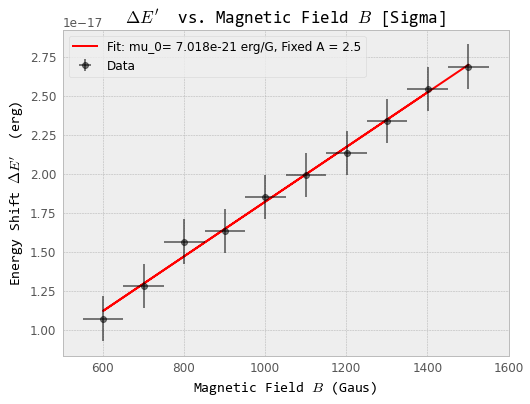

In [14]:
# PLOT2

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit2 = DelE2(B, *popt2)

#data
plt.plot(B, fit2, label = 'Fit: mu_0= %1.3e erg/G, Fixed A = 2.5' % popt2[0], color = 'r')

plt.errorbar(
    B, 
    delE_180, 
    yerr= sigmaE,
    xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("$\\Delta E'$  vs. Magnetic Field $B$ [Sigma]", **hfont)
plt.xlabel('Magnetic Field $B$ (Gaus)', **hfont)
plt.ylabel("Energy Shift $\\Delta E'$  (erg)", **hfont)
plt.legend(loc=2)

print(popt2)

hf.SaveFigure("Graphs/SigmaFitDelEvsB.png")

In [15]:
# # PLOT3

# #style
# hfont = {'fontname':'Consolas'}
# plt.figure()
# plt.style.use('bmh')


# # Better looking line
# B_line = np.linspace(min(B), max(B), 1000)
# fit3 = DelE3(B, *popt3)

# #data
# plt.plot(B, fit3, label = 'Fit: A= %1.3f' % tuple(popt3), color = 'b')

# plt.errorbar(
#     B, 
#     delE_180, 
#     yerr= sigmaE,
#     xerr= Berr, 
#     fmt='o', 
#     label = 'Data', 
#     color='black',
#     alpha =0.5
#     )

# #labels
# plt.title("Delta E vs. Magnetic Field B [Sigma]", **hfont)
# plt.xlabel('Magnetic Field B (Gaus)', **hfont)
# plt.ylabel('Energy Shift (erg)', **hfont)
# plt.legend(loc=2)

# print(popt3)

# # hf.SaveFigure("PiDelEvsB90Run3_3.png")

In [16]:
# this is with the constraint of A = 1/2
# print('Fit: mu_0 and A')
# hf.Chi2Values(DelE1,B,delE_180,popt1,sigmaE)

print('\n\n')
print('Fit: mu_0, A = 2.5')
hf.Chi2Values(DelE2,B,delE_180,popt2,sigmaE)

# print('\n\n')
# print('Fit: A, mu_0 = 9.2741E-21')
# hf.Chi2Values(DelE3,B,delE_180,popt3,sigmaE)

z = .01




Fit: mu_0, A = 2.5
Chi-square:  0.7267563324714325
Degrees of freedom:  8
Reduced chi-square:  0.09084454155892906
CDF:  0.0005441945746246033
p-test value (1 Tail bc not symmetric):  0.9994558054253754


In [17]:
# Error Values:
print("Error in Peaks (m)")
sigma_xi_pixel = 2/2
sigma_xi_meter = (2/2)*9*(10)**(-6) #Pixel x 9um x 10E-6= meter
print(sigma_xi_meter)

print('\nError in delta E Values (erg)')
for i in sigmaE: 
    print(i)

print('\n Percent error:')
percentage_error = (np.abs(9.2741E-21-popt2[0])/9.2741E-21)*100
print(percentage_error)

Error in Peaks (m)
9e-06

Error in delta E Values (erg)
1.4230747917466075e-18
1.4281754805669355e-18
1.4247047903955405e-18
1.425621867526609e-18
1.4218462326746495e-18
1.4267215818927343e-18
1.4273397988448686e-18
1.428003511504733e-18
1.4250598612074689e-18
1.4222249956698225e-18

 Percent error:
24.321636863111024


# prop B and Del E into Mu

In [18]:
# Error in mu from Propagation of delE and B 

def SigMu(sigDelE, SigB, delE, B, A):

    t1 = 1/(A*B)
    term1 = (t1**2)*sigDelE**2

    t2 = delE/(A*(B**2))
    term2 = (t2**2)*SigB**2

    var_mu = term1 +term2
    sig_mu = np.sqrt(var_mu)

    return sig_mu

def MuWeighAv_Varmu(mu_i, var_mu): 
    t1 = mu_i/var_mu
    sum1 = np.sum(t1)

    t2 = 1/var_mu
    sum2 = np.sum(t2)
    t3 = 1/sum2

    mu_av = sum1*t3
    return mu_av, t3

In [26]:
sig_mu180 = SigMu(sigmaE,Berr,delE_180,B,2.5)
var_mu180 = sig_mu180**2

mu_i = delE_180/(2.5*B)

mu_av, var_mu= MuWeighAv_Varmu(mu_i, var_mu180)

m = np.abs(popt2[1])
n = np.sqrt(m)



print('True Value: ')
print(9.2741E-21)
print('\npropagation of del E and B')
print(mu_av, np.sqrt(var_mu))

print('\nPercent error:')
percentage_error = (np.abs(9.2741E-21-mu_av)/9.2741E-21)*100
print(percentage_error)

print('\ncurvefit')
print(f'{popt2[0]} +/- {n}')

print('\nPercent error:')
percentage_error = (np.abs(9.2741E-21-popt2[0])/9.2741E-21)*100
print(percentage_error)

True Value: 
9.2741e-21

propagation of del E and B
7.249400130729992e-21 1.960493497872509e-22

Percent error:
21.831766632557425

curvefit
7.01848707567822e-21 +/- 8.10915835787238e-10

Percent error:
24.321636863111024
